<a href="https://colab.research.google.com/github/hwanython/AI-Basic-MNIST/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# 필요한 라이브러리 불러오기
from keras.datasets import mnist
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model


In [24]:
# MNIST 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

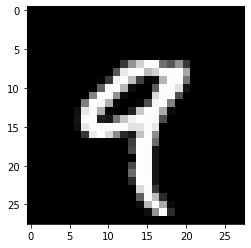

train_image 4번째 라벨은 9


In [25]:
import matplotlib.pyplot as plt
#train image의 5번째 이미지 추출
image = train_images[4]  #reshape전의 이미지

#plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()
print("train_image 4번째 라벨은", train_labels[4])

0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4


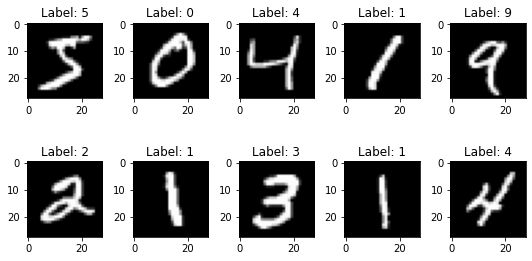

In [26]:
num = 10
images = train_images[:num]
labels = train_labels[:num]

num_row = 2
num_col = 5

#plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    print(i//num_col, i%num_col)
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()


In [27]:
# 이미지 데이터 준비하기 (모델에 맞는 크기로 바꾸고 0과 1사이로 스케일링)
# 노말라이즈를 하는, 0~1의 이미지를 기준으로 한다. (왜그런지 보쟈)
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [28]:
# 레이블을 범주형으로 인코딩
train_labels = to_categorical(train_labels) #범주형이라고하고, 원핫인코딩 필수적인 작업
#원핫 인코딩 
test_labels = to_categorical(test_labels)

In [29]:
# 모델 정의하기 (여기에서는 Sequential 클래스 사용)
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


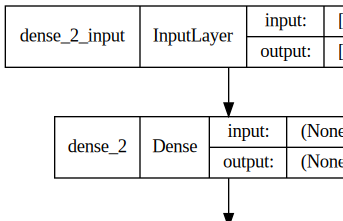

In [30]:
# 구조 확인
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot',format='svg'))

In [31]:
# 모델 컴파일 하기
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [32]:
# fit() 메서드로 모델 훈련 시키기
history=model.fit(train_images, train_labels, epochs=10, batch_size=64, verbose=1)
# batch size가 높을수록, 속도빠르고, 정화도가 낮아.


Epoch 1/10
938/938 [==============================] - 7s 7ms/step - loss: 0.2220 - accuracy: 0.9339
Epoch 2/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0912 - accuracy: 0.9728
Epoch 3/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0615 - accuracy: 0.9812
Epoch 4/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0459 - accuracy: 0.9860
Epoch 5/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0354 - accuracy: 0.9894
Epoch 6/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0280 - accuracy: 0.9921
Epoch 7/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0213 - accuracy: 0.9938
Epoch 8/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0166 - accuracy: 0.9951
Epoch 9/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0133 - accuracy: 0.9964
Epoch 10/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0104 - accuracy: 0.9969

In [35]:
# 테스트 데이터로 정확도 측정하기
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다.

Test loss: 0.08072724938392639
Test accuracy: 0.9819999933242798


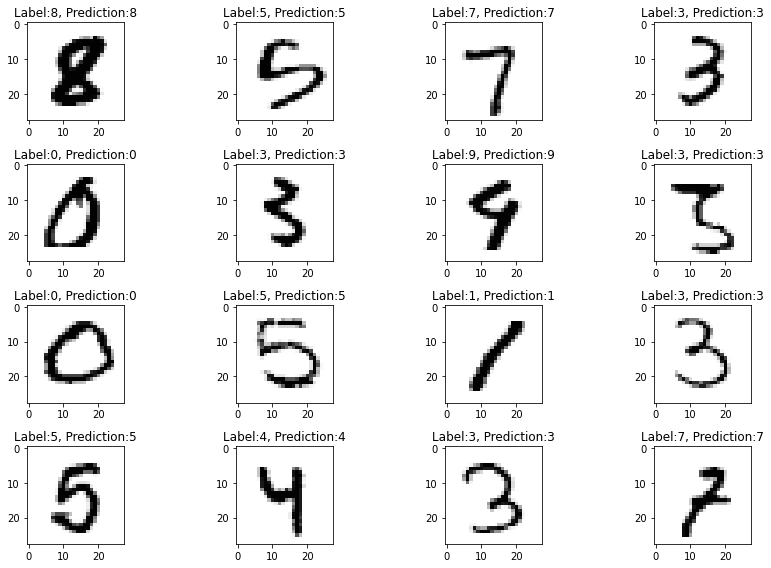

In [42]:
#결과파악.

import random
import numpy as np
predicted_result = model.predict(test_images)
predicted_labels = np.argmax(predicted_result, axis=1)

test_label = np.argmax(test_labels, axis=1)

correct_result = []

for n in range(0, len(test_label)):
    if predicted_labels[n] == test_label[n]:
       correct_result.append(n)

samples = random.choices(population=correct_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(test_images[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_label[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()